In [89]:
import matplotlib.pyplot as plt
import tsne
import nbodykit.lab
import os
import numpy as np
import sklearn
import scipy.spatial.distance as ssd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
base_dir = '.'

# wget -N https://data.sdss.org/sas/dr12/boss/lss/galaxy_DR12v5_CMASSLOWZTOT_South.fits.gz
# wget -N https://data.sdss.org/sas/dr12/boss/lss/galaxy_DR12v5_CMASSLOWZTOT_North.fits.gz
# then unzip them
 
# download Miniconda: https://docs.conda.io/en/latest/miniconda.html
# bash YOUR_MINICONDA_INSTALLER
# conda create --name galaxy python=3
# conda install -c bccp nbodykit
# conda install -c anaconda scikit-learn
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib
# conda install -c conda-forge numpy
# conda activate galaxy

In [ ]:
def read_data(filename):
    ''' Here we read the data catalogues '''
    galaxies_cat = nbodykit.lab.FITSCatalog(os.path.join(base_dir, filename))
    print('galaxies_cat.columns = ', galaxies_cat.columns)
    galaxies_cat = galaxies_cat[(galaxies_cat['Z'] > 0.01) & (galaxies_cat['Z'] < 0.9)]
    galaxies_cat['Weight'] = galaxies_cat['WEIGHT_SYSTOT'] * (galaxies_cat['WEIGHT_NOZ'] + galaxies_cat['WEIGHT_CP'] - 1.0)
    return galaxies_cat

def down_sample(cat, N):
    x = np.random.uniform(size=cat.size)
    return cat[x < float(N) / cat.size]

def plot_data(cat1, cat2):
    ''' Plot the catalogues '''
    cat1 = down_sample(cat1, 1000)
    cat1['RA'] -= 180
    cat2 = down_sample(cat2, 1000)
    cat2['RA'] -= 180

    plt.clf()
    plt.subplot(projection="aitoff")
    plt.title("BOSS DR12 survey footprint", y=1.1)
    plt.plot(np.radians(cat1['RA'].compute()), np.radians(cat1['DEC'].compute()), '.')
    plt.plot(np.radians(cat2['RA'].compute()), np.radians(cat2['DEC'].compute()), '.')
    plt.grid(True)
    plt.show()

galaxies_cat.columns =  ['AIRMASS', 'CAMCOL', 'COMP', 'DEC', 'DEVFLUX', 'EB_MINUS_V', 'EXPFLUX', 'EXTINCTION', 'FIBER2FLUX', 'FIBERID', 'FIELD', 'FINALN', 'FRACPSF', 'ICHUNK', 'ICOLLIDED', 'ID', 'IMAGE_DEPTH', 'IMATCH', 'INGROUP', 'IPOLY', 'ISECT', 'MJD', 'MODELFLUX', 'MULTGROUP', 'NZ', 'PLATE', 'PSFFLUX', 'PSF_FWHM', 'RA', 'RERUN', 'RUN', 'R_DEV', 'SKYFLUX', 'SPECTILE', 'Selection', 'TILE', 'Value', 'WEIGHT_CP', 'WEIGHT_FKP', 'WEIGHT_NOZ', 'WEIGHT_SEEING', 'WEIGHT_STAR', 'WEIGHT_SYSTOT', 'Weight', 'Z']
galaxies_cat.columns =  ['AIRMASS', 'CAMCOL', 'COMP', 'DEC', 'DEVFLUX', 'EB_MINUS_V', 'EXPFLUX', 'EXTINCTION', 'FIBER2FLUX', 'FIBERID', 'FIELD', 'FINALN', 'FRACPSF', 'ICHUNK', 'ICOLLIDED', 'ID', 'IMAGE_DEPTH', 'IMATCH', 'INGROUP', 'IPOLY', 'ISECT', 'MJD', 'MODELFLUX', 'MULTGROUP', 'NZ', 'PLATE', 'PSFFLUX', 'PSF_FWHM', 'RA', 'RERUN', 'RUN', 'R_DEV', 'SKYFLUX', 'SPECTILE', 'Selection', 'TILE', 'Value', 'WEIGHT_CP', 'WEIGHT_FKP', 'WEIGHT_NOZ', 'WEIGHT_SEEING', 'WEIGHT_STAR', 'WEIGHT_SYSTOT

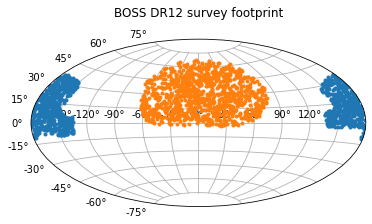

In [96]:
filename = 'galaxy_DR12v5_CMASSLOWZTOT_South.fits'
data_south = read_data(filename)
data_southm = data_south[(data_south['Z'] > 0.5) & (data_south['Z'] < 0.7)]
filename = 'galaxy_DR12v5_CMASSLOWZTOT_North.fits'
data_north = read_data(filename)
plot_data(data_south, data_north)
data_northm = data_north[(data_north['Z'] > 0.05) & (data_north['Z'] < 0.7)]

In [81]:
# standard model
cosmoSTD = nbodykit.lab.cosmology.Cosmology(Omega0_cdm=0.265, Omega0_b=0.045, h=0.7)
# wmap 7 model - Yen Chi Chen https://arxiv.org/pdf/1509.06443.pdf
cosmoYCC = nbodykit.lab.cosmology.Cosmology(Omega0_cdm=0.274, Omega0_b=0.0457, h=0.7)
cosmoP = nbodykit.lab.cosmology.Planck15 

(array([  557.,  3884.,  6707., 10408., 14525., 13543., 12277., 11101.,
        10081.,  8936.,  8907.,  8952.,  7646.,  7877.,  8736.,  7706.,
         6042.,  2842.,   983.,   111.]),
 array([-327.80017872, -260.08150499, -192.36283127, -124.64415754,
         -56.92548381,   10.79318992,   78.51186365,  146.23053738,
         213.9492111 ,  281.66788483,  349.38655856,  417.10523229,
         484.82390602,  552.54257975,  620.26125348,  687.9799272 ,
         755.69860093,  823.41727466,  891.13594839,  958.85462212,
        1026.57329585]),
 <BarContainer object of 20 artists>)

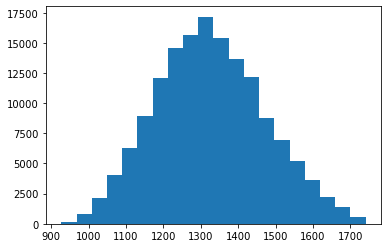

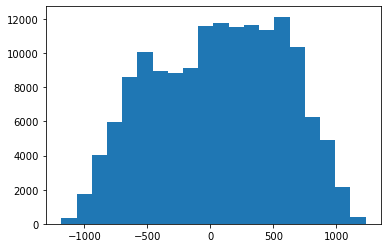

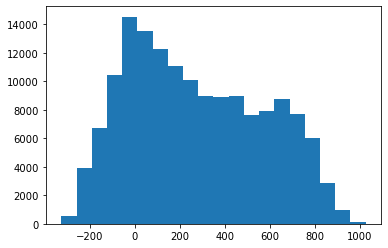

In [97]:
data_north['Position'] = nbodykit.transform.SkyToCartesian(data_north['RA'],\
    data_north['DEC'], data_north['Z'], cosmo=cosmoP)
data_south['Position'] = nbodykit.transform.SkyToCartesian(data_south['RA'],\
    data_south['DEC'], data_south['Z'], cosmo=cosmoP)
data_southm['Position'] = nbodykit.transform.SkyToCartesian(data_southm['RA'],\
    data_southm['DEC'], data_southm['Z'], cosmo=cosmoP)
plt.figure()
plt.hist(data_southm['Position'].compute()[:,0],20)
plt.figure()
plt.hist(data_southm['Position'].compute()[:,1],20)
plt.figure()
plt.hist(data_southm['Position'].compute()[:,2],20)

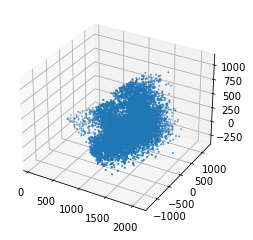

In [99]:
n_samples = 10000
sample_ixs = np.random.choice(data_southm['Position'].shape[0], n_samples, replace=False)
data_full = data_south['Position'].compute()
data_sampled = data_full[sample_ixs,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_sampled[:,0], data_sampled[:,1], zs=data_sampled[:,2], s=1);


In [32]:
data_south['Position'].shape[0]

372408

In [100]:
tsner = TSNE(n_components=2)
tsne_data_sampled = tsner.fit_transform(data_sampled)

In [40]:
data_slice = data_south
data_southm['Position'] = nbodykit.transform.SkyToCartesian(data_southm['RA'],\
    data_southm['DEC'], data_southm['Z'], cosmo=cosmoP)

In [54]:
data_south['DEC'].shape

(372408,)

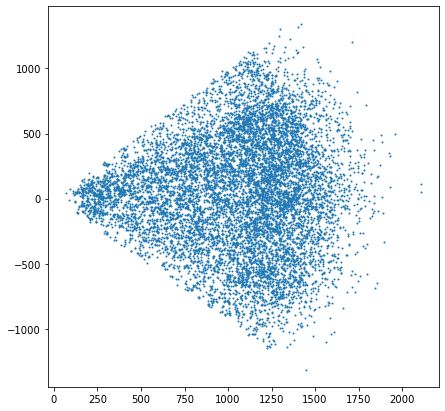

In [63]:
plt.figure(figsize=(7,7))
plt.scatter(data_sampled[:,0], data_sampled[:,1],s=1)

(array([ 9969., 23700., 31807., 47519., 52698., 95986., 77905., 27311.,
         5065.,   448.]),
 array([0.01386335, 0.10234255, 0.19082174, 0.27930093, 0.36778012,
        0.4562593 , 0.54473853, 0.6332177 , 0.7216969 , 0.8101761 ,
        0.8986553 ], dtype=float32),
 <BarContainer object of 10 artists>)

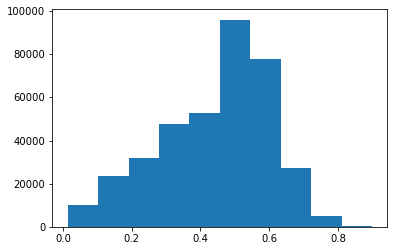

In [65]:
plt.hist(data_south['Z'].compute())

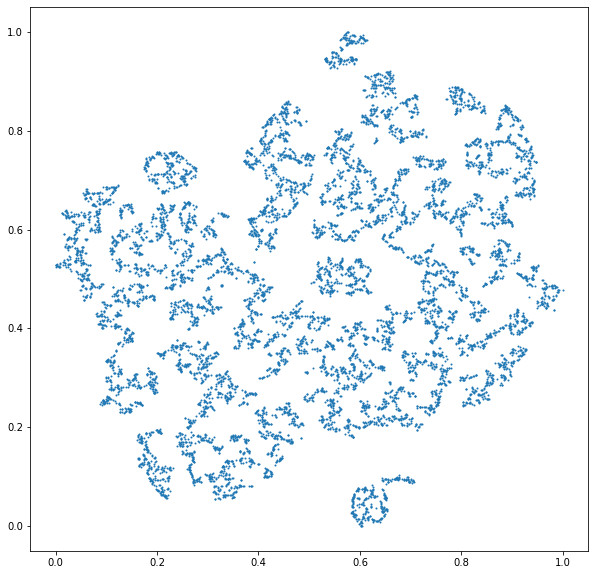

In [101]:
plt.figure(figsize=(10,10))
mmser = MinMaxScaler(feature_range=(0,1))
scaledtsne_data_sampled = mmser.fit_transform(tsne_data_sampled)
plt.scatter(scaledtsne_data_sampled[:,0], scaledtsne_data_sampled[:,1],s=1)


In [92]:
scaledtsne_data_sampled.shape

(10000, 2)

In [94]:
np.savetxt('tsne_south_scaled.csv', scaledtsne_data_sampled, fmt='%.10f',delimiter=',')